<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/190822_rastionlydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 30002 (delta 0), reused 6 (delta 0), pack-reused 29996
Receiving objects: 100% (30002/30002), 510.27 MiB | 33.19 MiB/s, done.
Resolving deltas: 100% (18747/18747), done.
Checking out files: 100% (3059/3059), done.


In [3]:
cd /content/models/research/

/content/models/research


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [5]:
!python setup.py build

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/model_lib_test.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib.py -> build/lib/object_detection
copying object_detection/model_lib_v2_test.py -> build/lib/object_detection
copying object_detection/model_main.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/model_lib_v2.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib_test.py -> build/lib/object_detection
copying object_detection/exporter_test.py -> build/lib/object_detection
copying object_detection/model_hparams.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copying object_detection/model_tpu_main.py -> build/lib/ob

In [6]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_lib_test.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/matchers/bipartite_matcher_test.py -> build/bdist.linux-x86_64/egg/object_detection/matchers
copying build/lib/object_detection/matchers/argmax_matcher_test.py -> build/bdist.linux-x86_64/egg/object_detection/matchers


In [0]:
!cp -R /content/models/research/slim/nets /content/models/research/object_detection
!cp -R /content/models/research/slim/deployment /content/models/research/object_detection

In [8]:
cd /content/models/research/object_detection


/content/models/research/object_detection


In [9]:
!rm -r images/bildverarbeitet/
!rm -r images
!mkdir images
!mkdir images/bildverarbeitet/

rm: cannot remove 'images/bildverarbeitet/': No such file or directory
rm: cannot remove 'images': No such file or directory


In [0]:
import collections
def return_coordinates(
    frame,
    boxes,
    classes,
    scores,
    category_index,
    instance_masks=None,
    instance_boundaries=None,
    keypoints=None,
    use_normalized_coordinates=False,
    max_boxes_to_draw=20,
    min_score_thresh=.5,
    agnostic_mode=False,
    line_thickness=4,
    groundtruth_box_visualization_color='black',
    skip_scores=False,
    skip_labels=False):
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  box_to_display_str_map = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_instance_boundaries_map = {}
  box_to_score_map = {}
  box_to_keypoints_map = collections.defaultdict(list)
  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if instance_boundaries is not None:
        box_to_instance_boundaries_map[box] = instance_boundaries[i]
      if keypoints is not None:
        box_to_keypoints_map[box].extend(keypoints[i])
      if scores is None:
        box_to_color_map[box] = groundtruth_box_visualization_color
      else:
        display_str = ''
        if not skip_labels:
          if not agnostic_mode:
            if classes[i] in category_index.keys():
              class_name = category_index[classes[i]]['name']
            else:
              class_name = 'N/A'
            display_str = str(class_name)
        if not skip_scores:
          if not display_str:
            display_str = '{}%'.format(int(100*scores[i]))
          else:
            display_str = '{}: {}%'.format(display_str, int(100*scores[i]))
        box_to_display_str_map[box].append(display_str)
        box_to_score_map[box] = scores[i]
        if agnostic_mode:
          box_to_color_map[box] = 'DarkOrange'
        else:
          box_to_color_map[box] = 'DarkOrange'

  # Draw all boxes onto image.
  coordinates_list = []
  counter_for = 0
  for box, color in box_to_color_map.items():
    ymin, xmin, ymax, xmax = box
    height, width, channels = frame.shape
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    coordinates_list.append([ymin, ymax, xmin, xmax, (box_to_score_map[box]*100), classes[i]])
    counter_for = counter_for + 1

  return coordinates_list

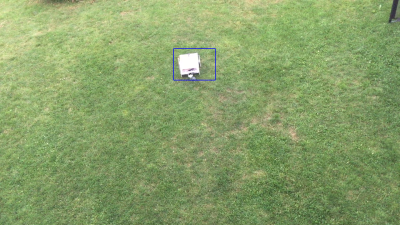

226
28500 : 81.29198551177979 : 1
28224 : 82.08270072937012 : 1
28959 : 84.9127471446991 : 1


KeyboardInterrupt: ignored

In [73]:
######## Video Object Detection Using Tensorflow-trained Classifier #########
#
# Author: Evan Juras
# Date: 1/16/18
# Description: 
# This program uses a TensorFlow-trained classifier to perform object detection.
# It loads the classifier uses it to perform object detection on a video.
# It draws boxes and scores around the objects of interest in each frame
# of the video.

## Some of the code is copied from Google's example at
## https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

## and some is copied from Dat Tran's example at
## https://github.com/datitran/object_detector_app/blob/master/object_detection_app.py

## but I changed it to make it more understandable to me.

# Import packages
import os
import time
import cv2
import numpy as np
import tensorflow as tf
import sys
import imutils
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import collections


# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = '/gdrive/My Drive/colabfiles/lektion31/inference_graph'
VIDEO_NAME = '/gdrive/My Drive/colabfiles/lektion31/IMG_4001.MOV'

# Grab path to current working directory
CWD_PATH = os.getcwd()

print(CWD_PATH)

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = "/gdrive/My Drive/colabfiles/lektion31/inference_graph/frozen_inference_graph.pb"

# Path to label map file
PATH_TO_LABELS = "/gdrive/My Drive/colabfiles/lektion31/label_map.pbtxt"

# Path to video
PATH_TO_VIDEO = os.path.join(CWD_PATH,VIDEO_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 1

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Open video file
video = cv2.VideoCapture(PATH_TO_VIDEO)
print("ok")
i = 0
bildverarbeitnr = 0
lasttime = time.time()
acttime = time.time()
while(video.isOpened()):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    if ret==True:
        
        frame_expanded = np.expand_dims(frame, axis=0)

        # Perform the actual detection by running the model with the image as input
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: frame_expanded})

        coordinates = return_coordinates(
                        frame,
                        np.squeeze(boxes),
                        np.squeeze(classes).astype(np.int32),
                        np.squeeze(scores),
                        category_index,
                        use_normalized_coordinates=True,
                        line_thickness=8,
                        min_score_thresh=0.80)
        try:
          #print(coordinates)
          coordinates = coordinates[0]
          #print(coordinates)
          ymin = coordinates[0]-30
          ymax = coordinates[1]+30
          xmin = coordinates[2]-30
          xmax = coordinates[3]+30
          genauigkeit = coordinates[4]
          obiekt = coordinates[5]
          print((xmax-xmin)*(ymax-ymin),":", genauigkeit, ":", obiekt)
          
        except: 
          pass


        # Draw the results of the detection (aka 'visulaize the results')


        # All the results have been drawn on the frame, so it's time to display it.
        
        
        #cv2_imshow(frame)
        #print(boxes)
        cv2.imwrite("/content/models/research/object_detection/images/bildverarbeitet/"+str(bildverarbeitnr)+".jpg", frame)
        bildverarbeitnr += 1
        acttime = time.time()
        
        if acttime - lasttime > 1:
          clear_output()
          if genauigkeit > 80:
            frame = cv2.rectangle(frame, (xmin,ymin), (xmax,ymax), (255, 0, 0), 2)
          ymin = 0
          ymax = 0
          xmin = 0
          xmax = 0
          genauigkeit = 0
          coordinates = []
          frame = imutils.resize(frame, 400)
          cv2_imshow(frame)
          
          print(bildverarbeitnr)
          lasttime = acttime
          
        
        #clear_output()
        

        # Press 'q' to quit
        #print(i)
        #i = i + 1
        #if cv2.waitKey(1) == ord('q'):
        #    break
    else:
        break

# Clean up
print("end1")
#video.release()
#cv2.destroyAllWindows()
print("end2")

# New Section

# New Section